In [113]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import time
import mediapipe as mp

In [114]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [115]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [116]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [117]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)#for drawing land marks of all on vedieo
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [118]:
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [119]:
draw_styled_landmarks(image, results)

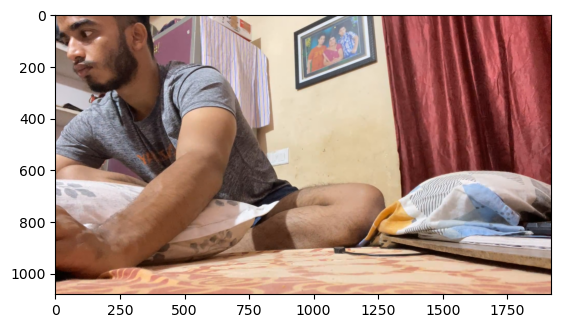

In [120]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [121]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [122]:
results_keypoints = extract_keypoints(results)

In [123]:
results_keypoints
np.save('0',results_keypoints)

In [124]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','im hungry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [125]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [126]:
#cap = cv2.VideoCapture(0)
# Set mediapipe model 
#with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#    
#    # NEW LOOP
#    # Loop through actions
#    for action in actions:
#        # Loop through sequences aka videos
#        for sequence in range(start_folder, start_folder+no_sequences):
#            # Loop through video length aka sequence length
#            for frame_num in range(sequence_length):
#
#                # Read feed
#                ret, frame = cap.read()
#
#                # Make detections
#                image, results = mediapipe_detection(frame, holistic)
#
#                # Draw landmarks
#                draw_styled_landmarks(image, results)
#                
#                # NEW Apply wait logic
#                if frame_num == 0: 
#                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                    # Show to screen
#                    cv2.imshow('OpenCV Feed', image)
#                    cv2.waitKey(1000)
#                else: 
#                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                    # Show to screen
#                    cv2.imshow('OpenCV Feed', image)
#                
#                # NEW Export keypoints
#                keypoints = extract_keypoints(results)
#                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                np.save(npy_path, keypoints)
#
#                # Break gracefully
#                if cv2.waitKey(10) & 0xFF == ord('q'):
#                    break
#                    
#    cap.release()
#    cv2.destroyAllWindows()

In [127]:
cap.release()
cv2.destroyAllWindows()

In [128]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [129]:
label_map = {action: num for num, action in enumerate(os.listdir("mp_data"))}

In [130]:
label_map

{'hello': 0, 'iloveyou': 1, 'im hungry': 2, 'thanks': 3}

In [131]:
actions

array(['hello', 'thanks', 'iloveyou', 'im hungry'], dtype='<U9')

In [132]:

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])



In [133]:
np.array(sequences).shape

(120, 30, 1662)

In [134]:
np.array(labels).shape

(120,)

In [135]:
X = np.array(sequences)

In [136]:
X.shape

(120, 30, 1662)

In [137]:
y = to_categorical(labels).astype(int)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [139]:
X_train.shape

(114, 30, 1662)

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [141]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [142]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [143]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [144]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
4/4 [==============================] - 6s 164ms/step - loss: 1.5542 - categorical_accuracy: 0.3070
Epoch 2/500
4/4 [==============================] - 1s 143ms/step - loss: 1.4488 - categorical_accuracy: 0.1930
Epoch 3/500
4/4 [==============================] - 1s 135ms/step - loss: 1.3532 - categorical_accuracy: 0.3158
Epoch 4/500
4/4 [==============================] - 1s 151ms/step - loss: 1.2420 - categorical_accuracy: 0.3596
Epoch 5/500
4/4 [==============================] - 1s 137ms/step - loss: 2.6046 - categorical_accuracy: 0.3596
Epoch 6/500
4/4 [==============================] - 1s 133ms/step - loss: 1.2928 - categorical_accuracy: 0.3509
Epoch 7/500
4/4 [==============================] - 0s 118ms/step - loss: 2.1951 - categorical_accuracy: 0.2281
Epoch 8/500
4/4 [==============================] - 0s 122ms/step - loss: 1.4978 - categorical_accuracy: 0.2456
Epoch 9/500
4/4 [==============================] - 0s 118ms/step - loss: 1.5434 - categorical_accuracy: 0.2719
E

4/4 [==============================] - 1s 139ms/step - loss: 0.3400 - categorical_accuracy: 0.8246
Epoch 75/500
4/4 [==============================] - 1s 143ms/step - loss: 0.3277 - categorical_accuracy: 0.8509
Epoch 76/500
4/4 [==============================] - 1s 137ms/step - loss: 0.3204 - categorical_accuracy: 0.8421
Epoch 77/500
4/4 [==============================] - 1s 136ms/step - loss: 0.3176 - categorical_accuracy: 0.8421
Epoch 78/500
4/4 [==============================] - 1s 137ms/step - loss: 0.3168 - categorical_accuracy: 0.8421
Epoch 79/500
4/4 [==============================] - 1s 137ms/step - loss: 0.3186 - categorical_accuracy: 0.8070
Epoch 80/500
4/4 [==============================] - 1s 140ms/step - loss: 0.5213 - categorical_accuracy: 0.7193
Epoch 81/500
4/4 [==============================] - 1s 136ms/step - loss: 0.3974 - categorical_accuracy: 0.7368
Epoch 82/500
4/4 [==============================] - 1s 126ms/step - loss: 0.3696 - categorical_accuracy: 0.8421
Epoch

4/4 [==============================] - 0s 117ms/step - loss: 0.6478 - categorical_accuracy: 0.6930
Epoch 147/500
4/4 [==============================] - 1s 125ms/step - loss: 0.6044 - categorical_accuracy: 0.7456
Epoch 148/500
4/4 [==============================] - 0s 122ms/step - loss: 0.5186 - categorical_accuracy: 0.7368
Epoch 149/500
1/4 [======>.......................] - ETA: 0s - loss: 0.4701 - categorical_accuracy: 0.7812

KeyboardInterrupt: 

In [145]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596,708
Trainable params: 596,708
Non-tr

In [146]:
res = model.predict(X_test)

1/1 [==============================] - 0s 375ms/step


In [147]:
actions[np.argmax(res[0])]

'iloveyou'

In [148]:
actions[np.argmax(y_test[0])]

'iloveyou'

In [149]:
model.save('action.h2')

INFO:tensorflow:Assets written to: action.h2\assets


INFO:tensorflow:Assets written to: action.h2\assets


In [150]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [151]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

1/1 [==============================] - 0s 40ms/step


In [152]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 1],
        [0, 1]],

       [[5, 0],
        [1, 0]],

       [[4, 0],
        [0, 2]],

       [[4, 0],
        [0, 2]]], dtype=int64)

In [153]:
accuracy_score(ytrue, yhat)

0.8333333333333334

In [154]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ilov